In [1]:
from processing.processor import *
from analysis.analysis import *
import numpy as np
from scipy.spatial.distance import cdist, pdist
import seaborn as sns
from matplotlib import rcParams

In [2]:
p = CifProcessor()
p.read_pkl_metainfo()
p.read_pkl(mode='rg', folder='data/processed/')

  3%|███▎                                                                                                              | 16/557 [00:00<00:03, 159.96it/s]

Reading files with generic numbers on receptors and gproteins.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:04<00:00, 128.43it/s]


In [3]:
len(p.dfl)

557

In [4]:
f = p.make_filter(State='Active', Cl='Rhodopsin', gprotein=True)

In [5]:
len(f)

83

In [6]:
p.table['Family'].unique()

array(['GPa1family', '-', 'Gi/o', 'Gs', 'Beta', 'Gq/11', 'Visual'],
      dtype=object)

In [10]:
f_gio = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gi/o', gprotein=True)
fuf = f_gio[f_gio['PDB']=='6FUF']
f_gio = f_gio[f_gio['Method']!='X-ray']
# Combine with 6FUF
f_gio = f_gio.append(fuf).reset_index(drop=True)

In [11]:
len(f_gio)

35

In [12]:
f_gio[f_gio['PDB']=='6FUF']

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function
34,OPSD,Opsins,A(Rhodopsin),Bovine,X-ray,6FUF,3.1,A,Active,100,Gi/o,αo,Agonist


In [13]:
f_gs = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gs', gprotein=True)
len(f_gs)

33

In [14]:
f_q11 = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gq/11', gprotein=True)
len(f_q11)

4

In [15]:
idx = p.dfl_list.index('7L0P')

In [16]:
x = p.dfl[idx]

In [17]:
x

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
0,7L0P,ATOM,C,A,7,52,ASN,1,N,N,...,NTR1_RAT,N,0,,0.0,0.0,,,,
1,7L0P,ATOM,C,A,7,52,ASN,2,CA,C,...,NTR1_RAT,N,52,,0.0,0.0,,,,
2,7L0P,ATOM,C,A,7,52,ASN,3,C,C,...,NTR1_RAT,N,0,,0.0,0.0,,,,
3,7L0P,ATOM,C,A,7,52,ASN,4,O,O,...,NTR1_RAT,N,0,,0.0,0.0,,,,
4,7L0P,ATOM,C,A,7,52,ASN,5,CB,C,...,NTR1_RAT,N,0,,0.0,0.0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,7L0P,ATOM,G,E,77,68,LYS,6949,NZ,N,...,NTR1_RAT,K,0,,0.0,0.0,,,,
6949,7L0P,ATOM,G,E,78,69,GLY,6950,N,N,...,NTR1_RAT,G,0,,0.0,0.0,,,,
6950,7L0P,ATOM,G,E,78,69,GLY,6951,CA,C,...,NTR1_RAT,G,0,,0.0,0.0,,,,
6951,7L0P,ATOM,G,E,78,69,GLY,6952,C,C,...,NTR1_RAT,G,0,,0.0,0.0,,,,


In [18]:
x[(x['label_atom_id'] == 'CA') &
  (x['gen_pos1'] > 7.45) &
  (x['gen_pos1'] < 7.55)]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
2224,7L0P,ATOM,C,A,299,362,ALA,2225,CA,C,...,NTR1_RAT,A,362,7.46x46?,7.46,46.0,S,,,
2229,7L0P,ATOM,C,A,300,363,ALA,2230,CA,C,...,NTR1_RAT,A,363,7.47x47,7.47,47.0,A,,,
2234,7L0P,ATOM,C,A,301,364,ILE,2235,CA,C,...,NTR1_RAT,I,364,7.48x48,7.48,48.0,I,,,
2242,7L0P,ATOM,C,A,302,365,ASN,2243,CA,C,...,NTR1_RAT,N,365,7.49x49,7.49,49.0,N,,,
2250,7L0P,ATOM,C,A,303,366,PRO,2251,CA,C,...,NTR1_RAT,P,366,7.50x50,7.50,50.0,P,,,
2257,7L0P,ATOM,C,A,304,367,ILE,2258,CA,C,...,NTR1_RAT,I,367,7.51x51,7.51,51.0,I,,,
2265,7L0P,ATOM,C,A,305,368,LEU,2266,CA,C,...,NTR1_RAT,L,368,7.52x52,7.52,52.0,L,,,
2273,7L0P,ATOM,C,A,306,369,TYR,2274,CA,C,...,NTR1_RAT,Y,369,7.53x53,7.53,53.0,Y,,,
2285,7L0P,ATOM,C,A,307,370,ASN,2286,CA,C,...,NTR1_RAT,N,370,7.54x54,7.54,54.0,N,,,


In [19]:
filtered_indices_gio = [x for x in p.get_dfl_indices(list(f_gio['PDB'])) if x != None]

In [20]:
filtered_indices_gs = [x for x in p.get_dfl_indices(list(f_gs['PDB'])) if x != None]

In [21]:
filtered_indices_q11 = [x for x in p.get_dfl_indices(list(f_q11['PDB'])) if x != None]

In [22]:
print(len(filtered_indices_gio)+len(filtered_indices_gs)+len(filtered_indices_q11))

72


In [23]:
section = 'H5'
poi =  'G.H5.23', 7.50
start = 7.40
end = 8.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [24]:
def get_closest_atoms(res1: pd.DataFrame, res2: pd.DataFrame):
    xyz1 = res1[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
    xyz2 = res2[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
    dists = cdist(xyz1, xyz2)
    print(min(dists))
    idxs = np.armin(dists)
    idx1 = idx[0]
    idx2 = idx[2]
    print(dists[idx[0], idx[1]])
    return res1.iloc[idx1], res2.iloc[idx2]

In [25]:
def dists_to_frame(pdb_id, dists, col_x, col_y):
    df = pd.DataFrame(dists, columns = col_x)
    return df.set_index([col_y])

def get_min_dist_table(l, section='H5', poi=('G.H5.23', 3.50), start=3.40, end=3.53, eps=0.05):
    if (start == None) or (end == None):
        start = poi[1] - eps
        end = poi[1] + eps
    if not isinstance(l, list):
        l = list(l)
    list_dists_df_list = []
    list_poi_list = []

    for i in range(len(l)):
        dists_df_list = []
        poi_list = []
        for j in range(len(l[i])):
            ex = p.dfl[l[i][j]]
            if 'gprot_pos' in ex.columns:
                pdb_id = ex['PDB'].iloc[0]
                r_ids = ex[(ex['gen_pos1'] > start) & 
                           (ex['gen_pos1'] < end)]['label_seq_id'].unique().to_list()
                g_ids = ex[(ex['gprot_pos'].str.contains(section))]['label_seq_id'].unique().to_list()
                r = ex[(ex[['label_seq_id']].isin(r_ids))][['label_seq_id', 'label_atom_id', 
                                                            'Cartn_x', 'Cartn_y', 'Cartn_z']]
                g = ex[(ex[['gprot_pos']].isin(g_ids))][['label_seq_id', 'label_atom_id', 
                                                         'Cartn_x', 'Cartn_y', 'Cartn_z']]
                
                r_idxs = r[['label_seq_id', 'label_atom_id']]
                g_idxs = g[['label_seq_id', 'label_atom_id']]
                
                r_xyz = r[['Cartn_x', 'Cartn_y', 'Cartn_z']]
                g_xyz = g[['Cartn_x', 'Cartn_y', 'Cartn_z']]
                
                dists = get_closest_atoms(r, g)
                
        list_dists_df_list.append(dists_df_list)
        list_poi_list.append(poi_list)
    return list_poi_list, list_dists_df_list

def get_interaction_tables(l, poi=('G.H5.23', 3.50), start=None, end=None, eps=0.05, max_dist=50):
    section = poi[0].split('.')[1]
    if (start == None) or (end == None):
        start = poi[1] - eps
        end = poi[1] + eps
    if not isinstance(l, list):
        l = list(l)
    list_dists_df_list = []
    list_poi_list = []
    for i in range(len(l)):
        dists_df_list = []
        poi_list = []
        for j in range(len(l[i])):
            ex = p.dfl[l[i][j]]
            pdb_id = ex['PDB'].iloc[0]
            if 'gprot_pos' in ex.columns:
                if len(ex[ex['gprot_pos']!=''])>0:
                    col_x = ex[(ex['gen_pos1'] > start) & 
                               (ex['gen_pos1'] < end)&
                               (ex['label_atom_id'] == 'CA')]['gen_pos1'].to_list()
                    ra = ex[(ex['gen_pos1'] > start) &
                           (ex['gen_pos1'] < end) &
                           (ex['label_atom_id'] == 'CA')][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                    col_y = ex[(ex['gprot_pos'].str.contains(section)) &
                               (ex['label_atom_id'] == 'CA')]['gprot_pos'].to_list()
                    ga = ex[(ex['gprot_pos'].str.contains(section)) &
                               (ex['label_atom_id'] == 'CA')][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                    if ga.shape[0] * ra.shape[0] > 0:
                        dists = cdist(ra, ga).T
                        dist_df = dists_to_frame(pdb_id, dists, col_x, col_y)
                        if (poi[1] in col_x) & (poi[0] in col_y):
                            if max_dist > dist_df.loc[poi]:
                                poi_value = dist_df.loc[poi]
                            else:
                                poi_value = np.nan
                        else:
                            poi_value = np.nan
                        if (len(col_x) > 0) & (len(col_y) > 0):
                            dists_df_list.append((pdb_id, i, dist_df))
                        if poi_value != np.nan:
                            poi_list.append((pdb_id, i, poi_value))
                    else:
                        print("Did not find specified labels for {} ==> gprot {} | receptor {}"\
                              .format(pdb_id, ga.shape, ra.shape))
                else:
                    print("Did not find ANY gprotein labels:", pdb_id)
                
        list_dists_df_list.append(dists_df_list)
        list_poi_list.append(poi_list)
    return list_poi_list, list_dists_df_list

In [26]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=('G.H5.23', 7.5), start=3.40, end=3.53, eps=0.05)

Did not find ANY gprotein labels: 6G79
Did not find specified labels for 6K41 ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 6OIK ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7E33 ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7CMU ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7CMV ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 6VMS ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7L0P ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7JVQ ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7AUE ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 6GDG ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7LJD ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 7LJC ==> gprot (0, 3) | receptor (12, 3)
Did not find specified labels for 6NI3 ==> gprot (0, 3) | rec

In [80]:
c = 0
for df in p.dfl:
    if 'gprot_pos' in df.columns:
        print(df.iloc[0]['PDB'])
        c+=1

2X72
2YDO
2YDV
3CAP
3DQB
3P0G
3PQR
3PXO
3QAK
3SN6
4A4M
4BEY
4BEZ
5UZ7
5VAI
6B3J
6CMO
6D9H
6DDE
6DDF
6E3Y
6G79
6GDG
6K41
6K42
6KPF
6KPG
6LFM
6LFO
6LI3
6LMK
6LML
6LPB
6M1H
6M1I
6N4B
6NBF
6NBH
6NBI
6NI3
6NIY
6OIJ
6OIK
6OMM
6ORV
6OS9
6OSA
6OT0
6OY9
6OYA
6P9X
6P9Y
6PB0
6PB1
6PT0
6QNO
6TKO
6U1N
6UO8
6UO9
6UOA
6UUN
6UUS
6UVA
6VCB
6VJM
6VMS
6VN7
6W2Y
6WHA
6WHC
6WI9
6WIV
6WPW
6WWZ
6WZG
6X18
6X19
6X1A
6XBJ
6XBK
6XBL
6XBM
6XOX
7AD3
7AUE
7BW0
7BZ2
7C2E
7C7S
7CFM
7CFN
7CKW
7CKX
7CKY
7CKZ
7CMU
7CMV
7CRH
7CUM
7CX2
7CX3
7CX4
7CZ5
7D3S
7D68
7D76
7D77
7D7M
7DFL
7DHI
7DHR
7E2X
7E2Y
7E2Z
7E32
7E33
7EB2
7JJO
7JV5
7JVP
7JVQ
7JVR
7KH0
7L0P
7L0Q
7L0R
7L0S
7LCI
7LCK
7LJC
7LJD
7MBX
7MBY


In [81]:
c

134

In [76]:
list_dists_df_list[0]

[('7JVR',
  0,
                7.46       7.47       7.48       7.49       7.50       7.51  \
  G.H5.01  51.058991  52.335387  49.482974  46.772660  46.382158  46.308003   
  G.H5.02  49.909190  50.969401  47.969532  45.466473  45.025286  44.658905   
  G.H5.03  49.352042  50.251924  47.353152  44.813402  44.056885  43.736993   
  G.H5.04  47.343263  48.445411  45.696676  42.948558  42.244629  42.224344   
  G.H5.05  45.303557  46.474731  43.589600  40.935589  40.503787  40.352706   
  G.H5.06  44.159818  45.040356  42.066937  39.599670  38.958905  38.544808   
  G.H5.07  43.104251  43.985677  41.216376  38.569963  37.676922  37.524326   
  G.H5.08  41.111115  42.277970  39.560030  36.757057  36.144258  36.216434   
  G.H5.09  39.458846  40.507940  37.577369  35.000689  34.541908  34.288875   
  G.H5.10  38.696075  39.431525  36.525450  34.055016  33.215966  32.820640   
  G.H5.11  37.404921  38.286119  35.634551  32.890842  31.911694  31.926582   
  G.H5.12  35.062773  36.197625  33.4

In [27]:
len(list_dists_df_list[0])

26

In [28]:
len(list_dists_df_list[1])

22

In [29]:
len(list_dists_df_list[2])

3

In [30]:
poi_gio = [x for x in list_poi_list[0] if ((x[1] == 0) & (x[2] > 0))]
poi_gs = [x for x in list_poi_list[1] if ((x[1] == 1) & (x[2] > 0))]
poi_q11 = [x for x in list_poi_list[2] if ((x[1] == 2) & (x[2] > 0))]

In [31]:
len(poi_gio) + len(poi_gs) + len(poi_q11)

0

In [32]:
poi_gs

[]

In [33]:
poi_gio

[]

In [34]:
eg = p.dfl_list.index('6OIK')
x = p.dfl[eg]

In [35]:
x[x['gprot_pos'].str.contains('H5.')]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id


In [36]:
x[x['label_seq_id']==430]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id


In [43]:
x[(x['gen_pos1']>7.44) &
  (x['gen_pos1']<8.53)]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid,gprot_pos,uniprot_comp_id,fam_comp_id
1905,6OIK,ATOM,R,A,310,432,ASN,1906,CA,C,...,ACM2_HUMAN,N,432,7.45x45,7.45,45.0,N,,,
1913,6OIK,ATOM,R,A,311,433,SER,1914,CA,C,...,ACM2_HUMAN,S,433,7.46x46,7.46,46.0,S,,,
1919,6OIK,ATOM,R,A,312,434,THR,1920,CA,C,...,ACM2_HUMAN,T,434,7.47x47,7.47,47.0,T,,,
1926,6OIK,ATOM,R,A,313,435,ILE,1927,CA,C,...,ACM2_HUMAN,I,435,7.48x48,7.48,48.0,I,,,
1934,6OIK,ATOM,R,A,314,436,ASN,1935,CA,C,...,ACM2_HUMAN,N,436,7.49x49,7.49,49.0,N,,,
1942,6OIK,ATOM,R,A,315,437,PRO,1943,CA,C,...,ACM2_HUMAN,P,437,7.50x50,7.50,50.0,P,,,
1949,6OIK,ATOM,R,A,316,438,ALA,1950,CA,C,...,ACM2_HUMAN,A,438,7.51x51,7.51,51.0,A,,,
1954,6OIK,ATOM,R,A,317,439,CYS,1955,CA,C,...,ACM2_HUMAN,C,439,7.52x52,7.52,52.0,C,,,
1960,6OIK,ATOM,R,A,318,440,TYR,1961,CA,C,...,ACM2_HUMAN,Y,440,7.53x53,7.53,53.0,Y,,,
1972,6OIK,ATOM,R,A,319,441,ALA,1973,CA,C,...,ACM2_HUMAN,A,441,7.54x54,7.54,54.0,A,,,


In [38]:
poi_q11

[]

In [39]:
poi_gio_arr = np.asarray(poi_gio)[:, 2].astype(float)
poi_gs_arr = np.asarray(poi_gs)[:, 2].astype(float)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [40]:
with open('gq11_350_h523.txt', 'w') as f:
    f.write(str(poi_q11))
with open('gs_350_h523.txt', 'w') as f:
    f.write(str(poi_gs))
with open('gio_350_h523.txt', 'w') as f:
    f.write(str(poi_gio))

In [41]:
poi_gio_arr

NameError: name 'poi_gio_arr' is not defined

In [42]:
poi_q11

[]

In [ ]:
if len(poi_q11) == 0:
    poi_q11_arr = np.nan
else:
    poi_q11_arr = np.asarray(poi_q11)[:, 2].astype(float)

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['Gi/o', 'Gs', 'Gq11'])
y = [np.mean(poi_gio_arr), np.mean(poi_gs_arr), np.mean(poi_q11_arr)]
e = np.array([np.std(poi_gio_arr), np.std(poi_gs_arr), np.std(poi_q11_arr)])
plt.errorbar(x, y, e, linestyle='None', fmt='-o')
plt.show()

NameError: name 'poi_gio_arr' is not defined

In [45]:
def get_cell(dataframe, row_idx, col_idx):
    if (row_idx in dataframe.index.to_list()) & (col_idx in dataframe.columns.to_list()):
        return dataframe.loc[row_idx, col_idx].astype(float)
    else:
        return None

In [46]:
def make_overview_df(dists_df_list):
    cols = []
    rows = []
    for i in range(len(dists_df_list)):
        l = dists_df_list[i]
        df = l[2]
        g_ind = df.index.to_list()
        r_ind = df.columns.to_list()
        cols = list(set(cols + r_ind))
        rows = list(set(rows + g_ind))
    occ_df = pd.DataFrame(index=rows, columns=cols)
    mean_df = pd.DataFrame(index=rows, columns=cols)
    std_df = pd.DataFrame(index=rows, columns=cols)
    for i in range(len(rows)):
        for j in range(len(cols)):
            val_list = []
            row_idx = rows[i]
            col_idx = cols[j]
            for k in range(len(dists_df_list)):
                df = dists_df_list[k][2]
                val = get_cell(df, row_idx, col_idx)
                if type(val) == pd.core.series.Series:
                    val = val.iloc[0]
                if val != None:
                    val_list.append(val)
            occ_df.loc[row_idx, col_idx] = len(val_list)
            mean_df.loc[row_idx, col_idx] = np.mean(val_list)
            std_df.loc[row_idx, col_idx] = np.std(val_list)
    occ_df = occ_df.sort_index().reindex(sorted(occ_df.columns), axis=1).astype(int)
    mean_df = mean_df.sort_index().reindex(sorted(mean_df.columns), axis=1).astype(float)
    std_df = std_df.sort_index().reindex(sorted(std_df.columns), axis=1).astype(float)
    return occ_df, mean_df, std_df

In [47]:
def make_overview_plots(df, title='Occurances', cl='A', gprot='Gs', figsize=(20, 15), path='plots/', show=True, save=False):
    name = title + '_' + cl + '_' + gprot
    rcParams['figure.figsize'] = 20, 15
    ax = sns.heatmap(df, cmap='RdYlGn_r', linewidths=.1, annot=True)
    ax.set_title(title + ' ' + cl + ' ' + gprot)
    if show:
        ax.plot()
    if save:
        ax.figure.savefig(path+name+'.png')

# Gio

In [48]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=('G.H5.23', 3.5), eps=0.05, max_dist=20)

Did not find ANY gprotein labels: 6G79
Did not find specified labels for 6K41 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6OIK ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7E33 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMU ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMV ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6VMS ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L0P ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7JVQ ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7AUE ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6GDG ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJD ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJC ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6NI3 ==> gprot (0, 3) | receptor (9, 3)

In [49]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[0])

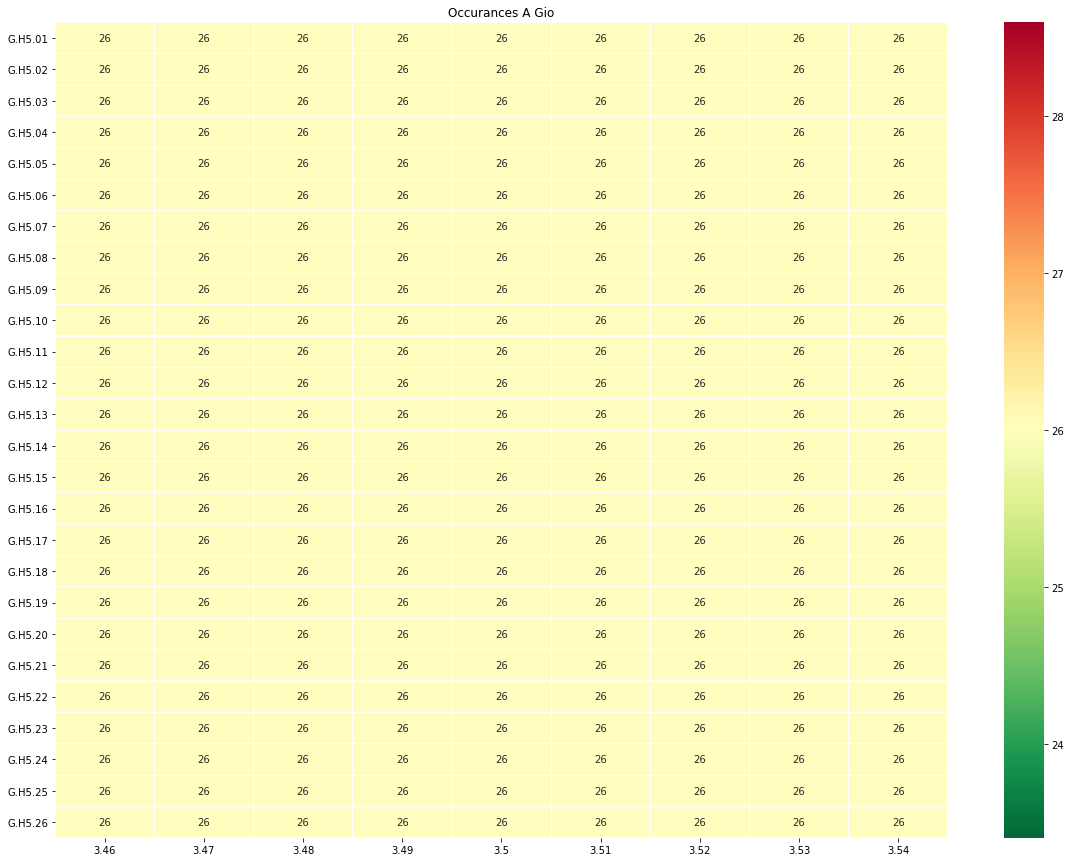

In [52]:
make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gio', save=False)

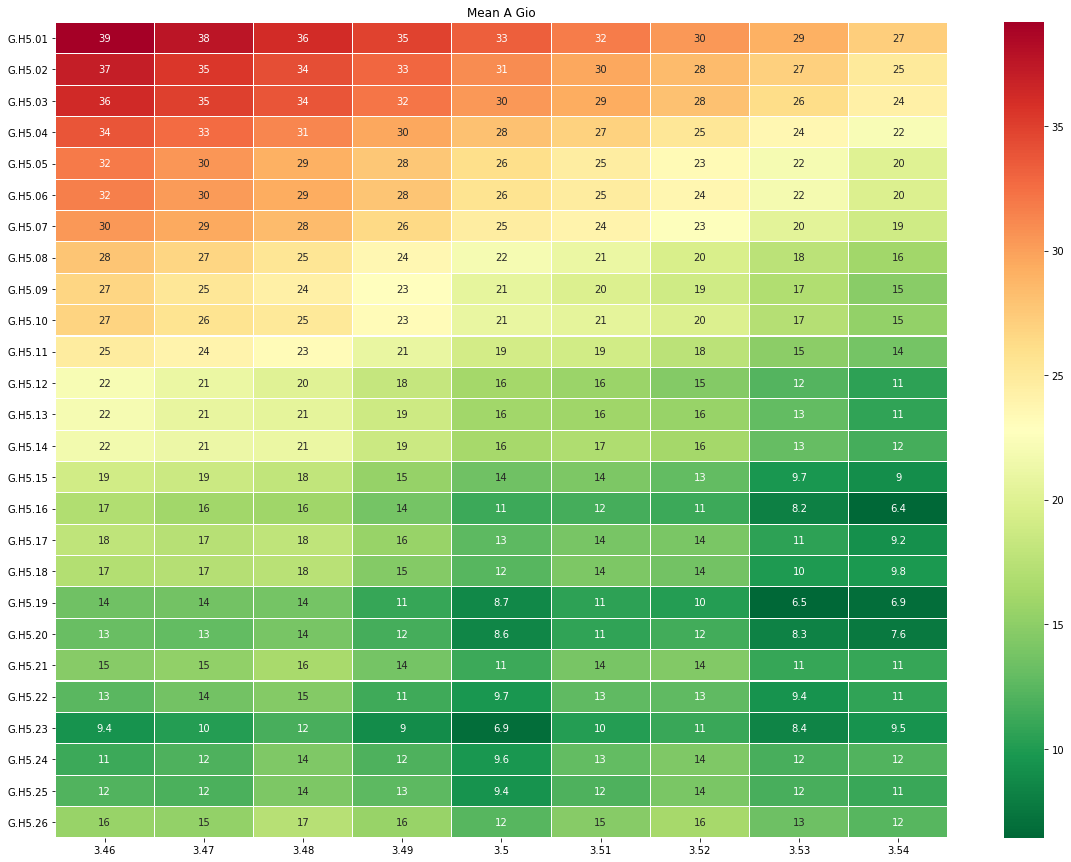

In [53]:
make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gio', save=False)

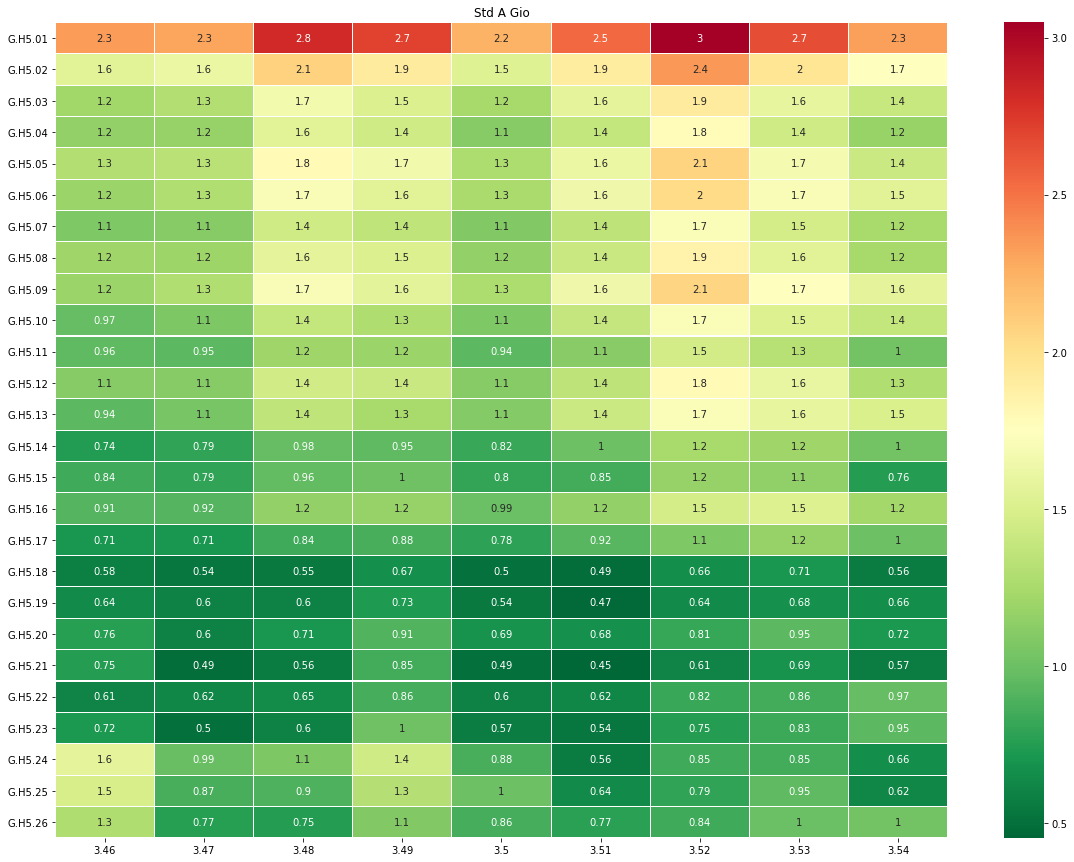

In [54]:
make_overview_plots(std_df, title='Std', cl='A', gprot='Gio', save=False)

# Gs

In [56]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[1])

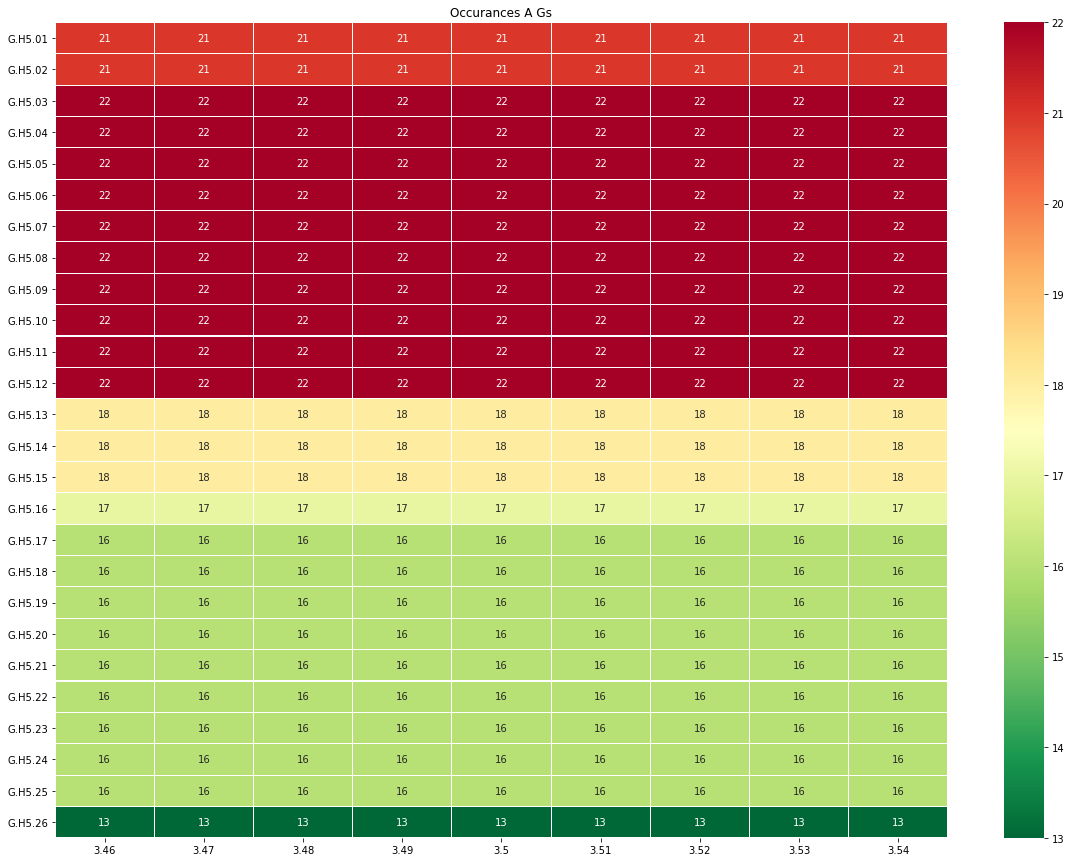

In [57]:
make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gs', save=False)

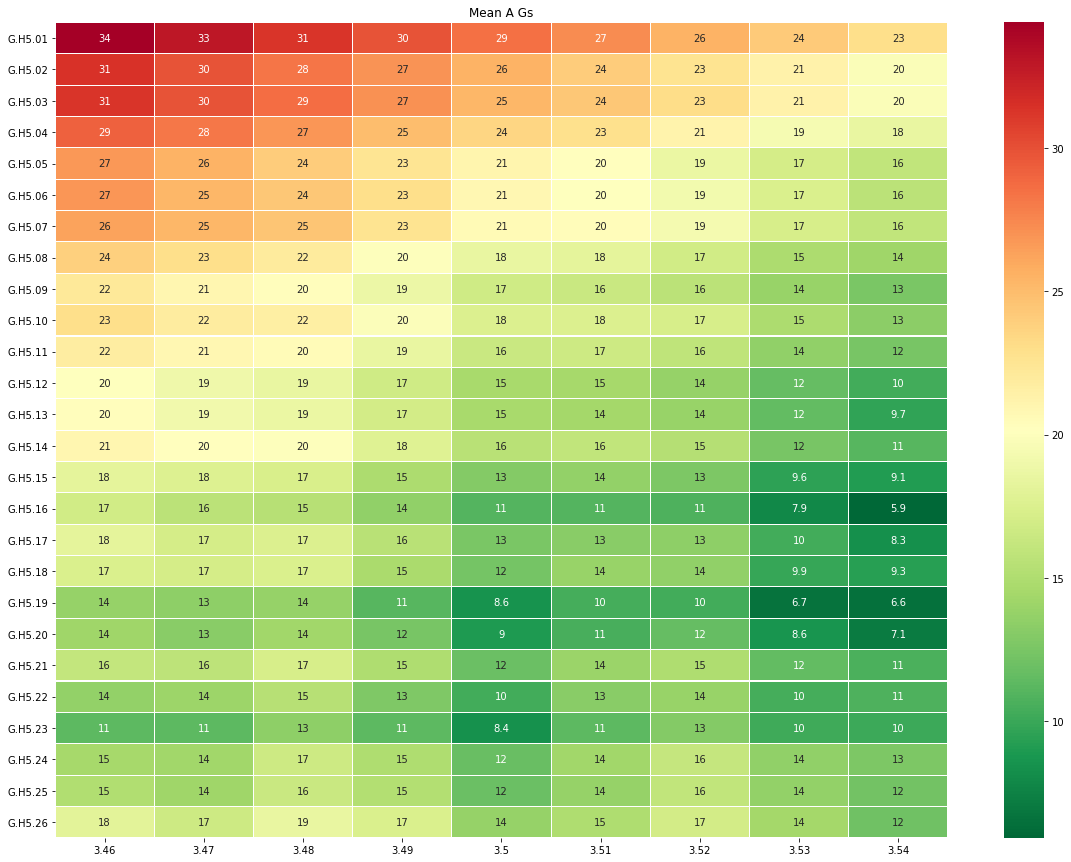

In [58]:
make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gs', save=False)

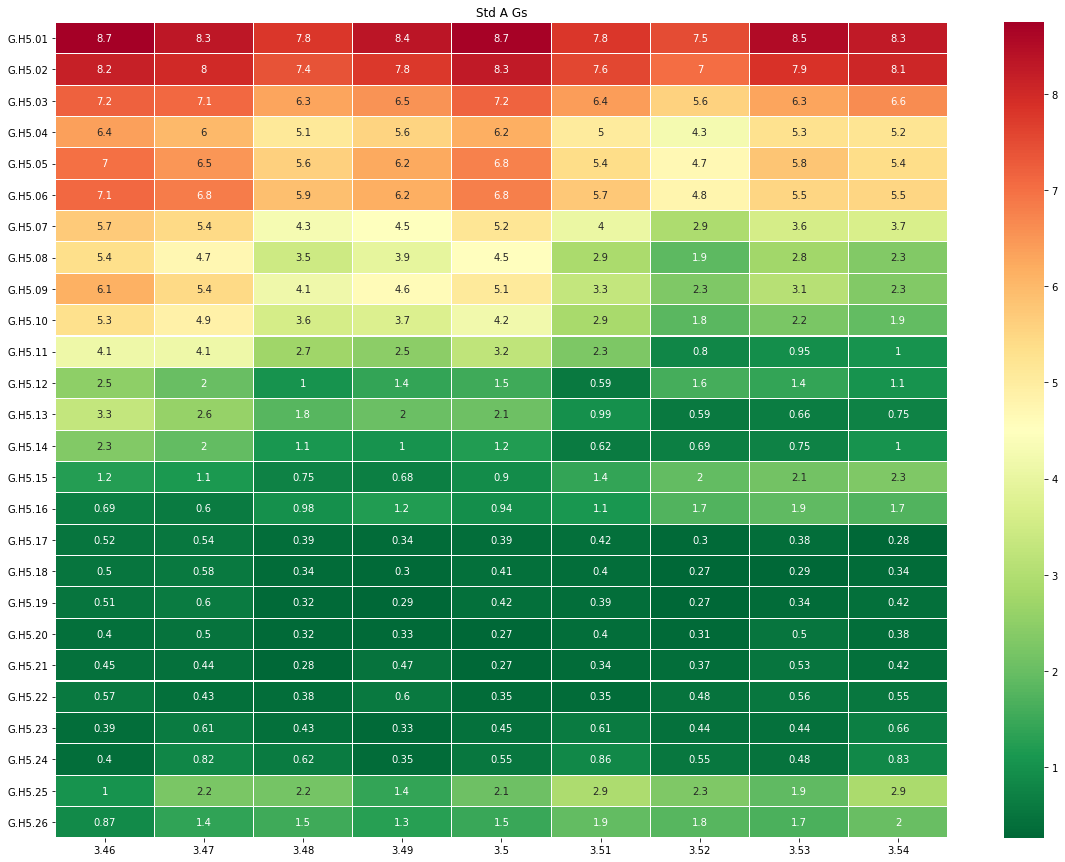

In [59]:
make_overview_plots(std_df, title='Std', cl='A', gprot='Gs', save=False)

In [ ]:
# chimera 11 last residues get changed

# Gq/11

In [61]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[2])

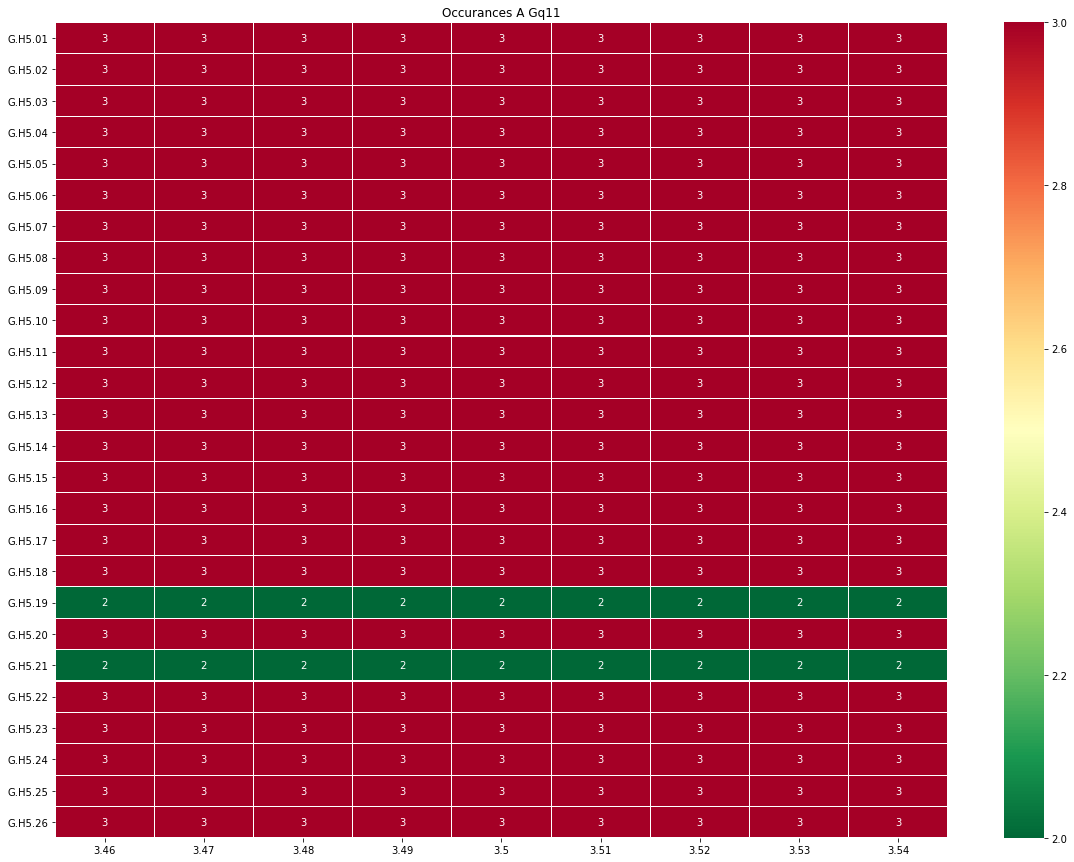

In [62]:
if len(occ_df)>0:
    make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gq11', save=False)

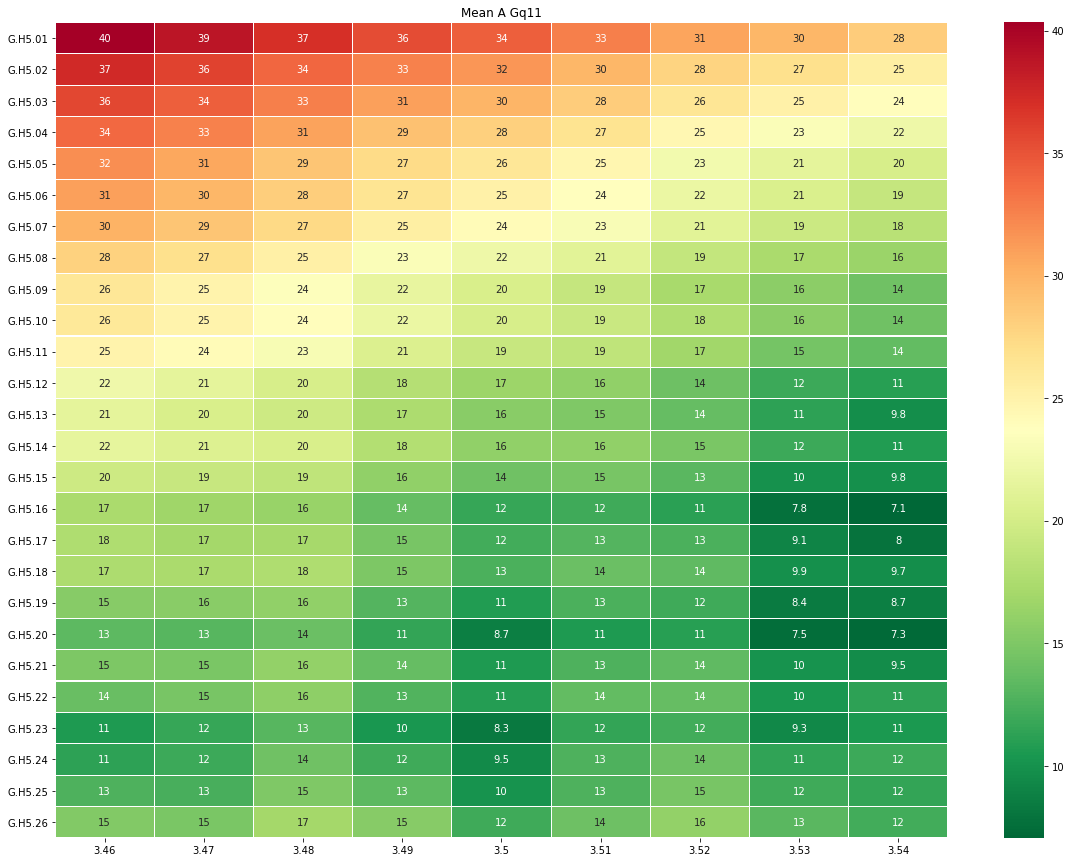

In [63]:
if len(occ_df)>0:
    make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gq11', save=False)

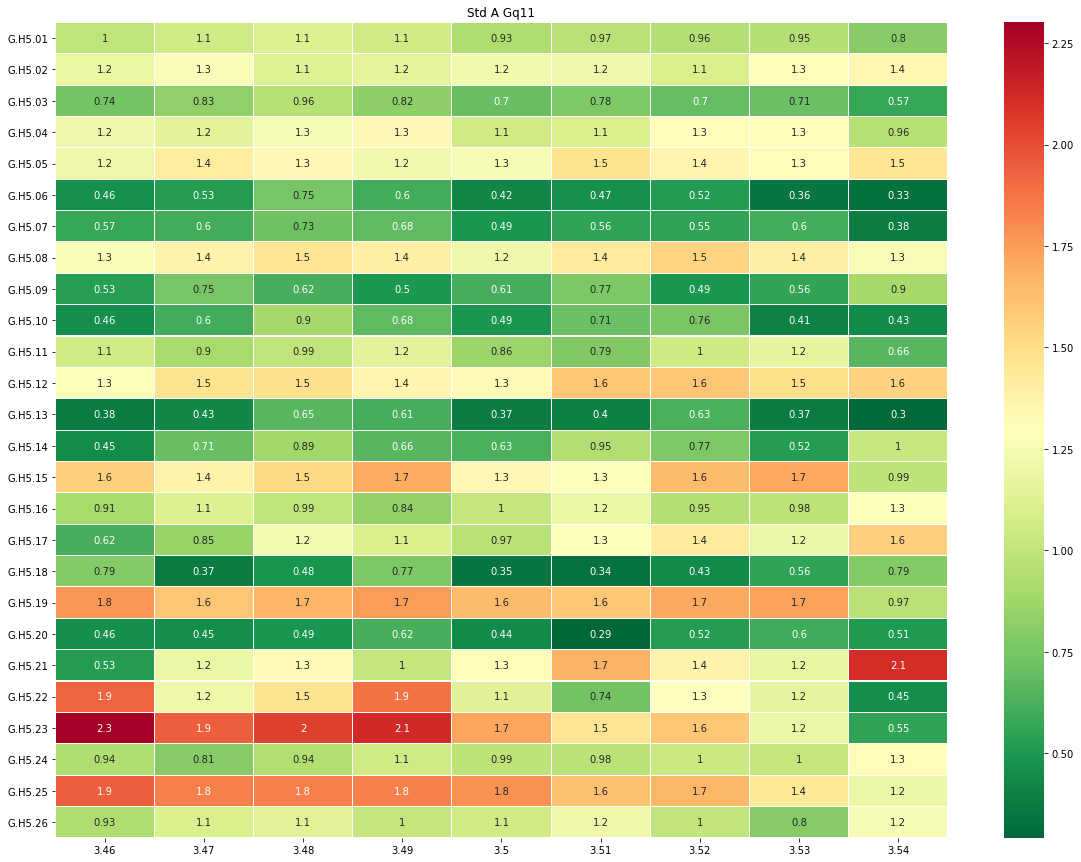

In [64]:
if len(occ_df)>0:
    make_overview_plots(std_df, title='Std', cl='A', gprot='Gq11', save=False)

# Difference

In [65]:
def get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=10):
    col1 = std_df1.columns.to_list()
    col2 = std_df2.columns.to_list()
    ind1 = std_df1.index.to_list()
    ind2 = std_df2.index.to_list()
    if col1 != col2:
        print("receptor gen numbers do not match")
    if ind1 != ind2:
        print("gprotein gen numbers do not match")
    col = sorted(list(set(col1+col2)))
    ind = sorted(list(set(ind1+ind2)))
    val1 = std_df1.to_numpy().astype(float)
    val2 = std_df2.to_numpy().astype(float)
    mask_m1 = mean_df1.to_numpy().astype(float) > cutoff_mean
    mask_m2 = mean_df2.to_numpy().astype(float) > cutoff_mean
    data = val1-val2
    if ab:
        data = np.abs(data)
    data[mask_m1] = np.nan
    data[mask_m2] = np.nan
    return pd.DataFrame(data=data, index=ind, columns=col)

In [66]:
section = 'H5'
poi =  'G.H5.23', 7.50
start = 7.40
end = 8.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [67]:
len(l[0])+len(l[1])+len(l[2])

72

In [68]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=poi)

Did not find ANY gprotein labels: 6G79
Did not find specified labels for 6K41 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6OIK ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7E33 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMU ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMV ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6VMS ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L0P ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7JVQ ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7AUE ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6GDG ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJD ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJC ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6NI3 ==> gprot (0, 3) | receptor (9, 3)

In [69]:
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=16)

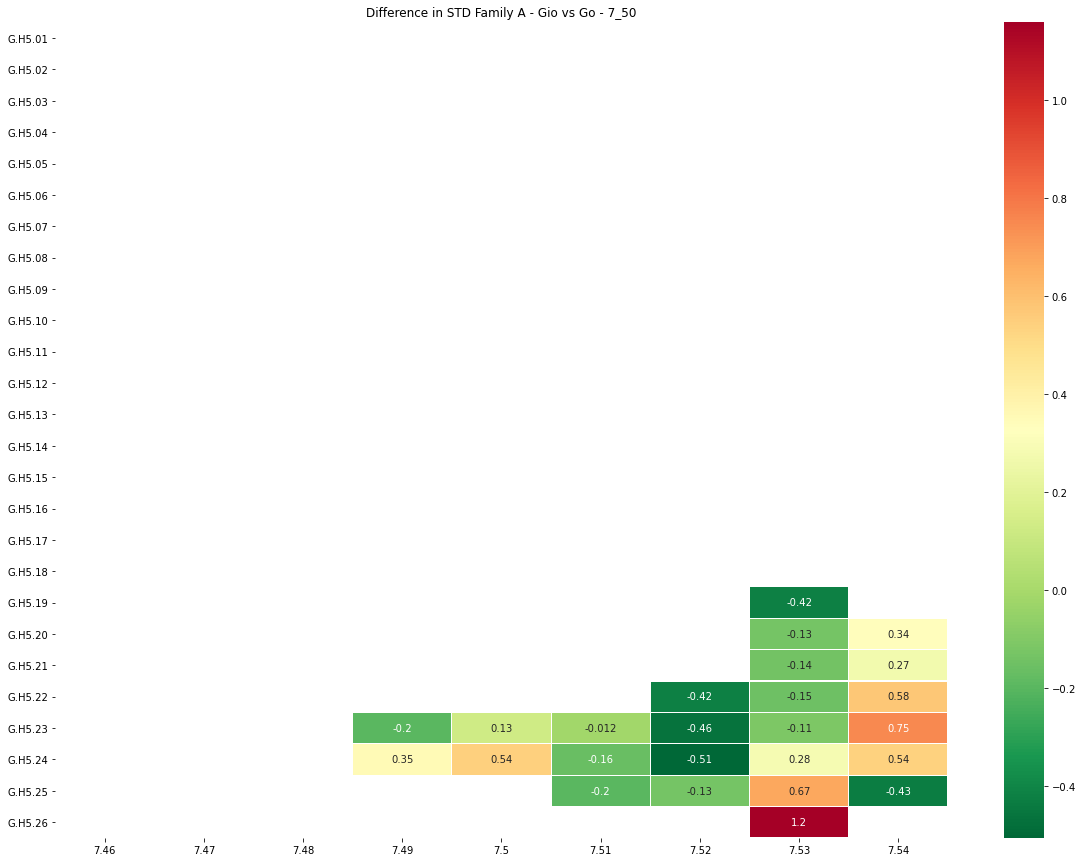

In [70]:
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - 7_50', save=True)

In red (positive range) we see interactions where the standard-deviation in Gio is greater than in Gs,
In green (negative range) the standard deviation in Gio is smaller than in Gs. Use the Flag "ab" in get_overview_diff to look at absolute differences!

- Gi/o group 1: all the 5h5-smth, ada2b
- Gi/o group 2: the rest

In [71]:
section = 'H5'
poi =  'G.H5.23', 3.5
start = 3.42
end = 3.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=poi, eps=.05)
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=12)

Did not find ANY gprotein labels: 6G79
Did not find specified labels for 6K41 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6OIK ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7E33 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMU ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMV ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6VMS ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L0P ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7JVQ ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7AUE ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6GDG ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJD ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJC ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6NI3 ==> gprot (0, 3) | receptor (9, 3)

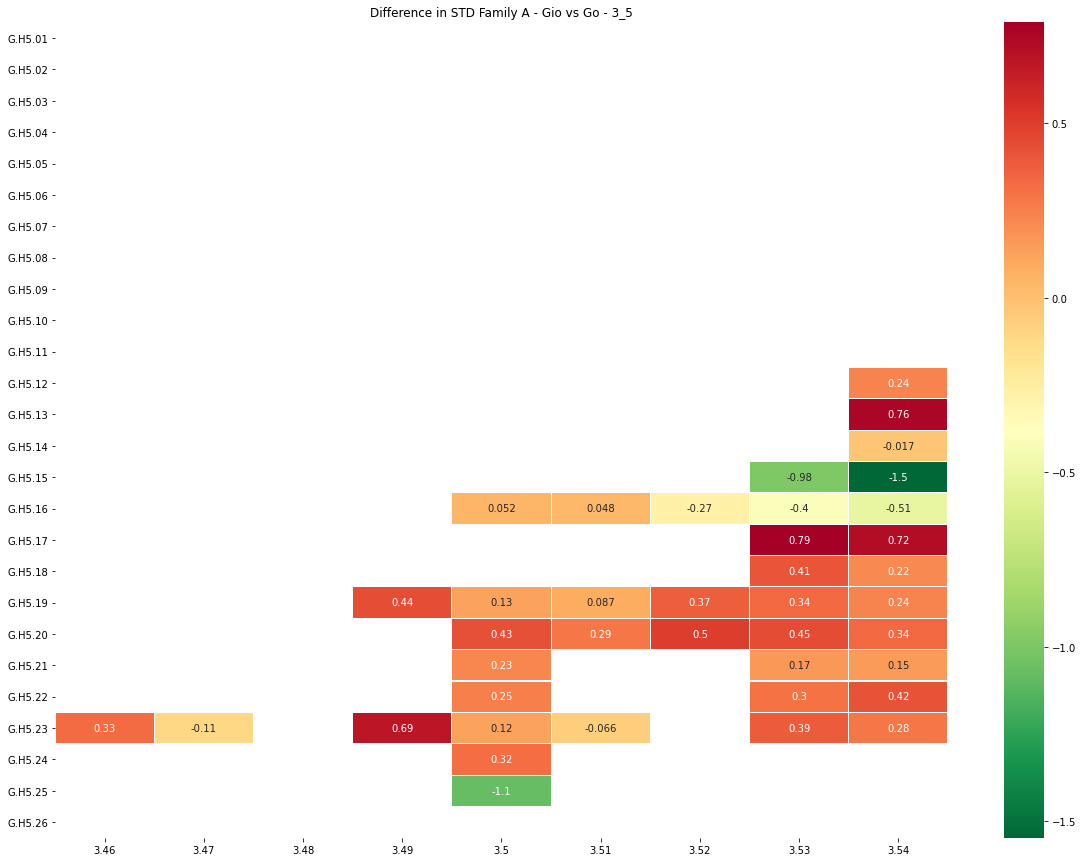

In [72]:
poi_str = list(str(poi[1]))[0] + '_' + ''.join(list(str(poi[1]))[2:])
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - ' + poi_str, save=True)

In [73]:
section = 'H5'
poi =  'G.H5.23', 7.5
start = 3.42
end = 3.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]
list_poi_list, list_dists_df_list = get_interaction_tables(l, poi=poi, eps=.05)
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=16)

Did not find ANY gprotein labels: 6G79
Did not find specified labels for 6K41 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6OIK ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7E33 ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMU ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7CMV ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6VMS ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7L0P ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7JVQ ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7AUE ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6GDG ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJD ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 7LJC ==> gprot (0, 3) | receptor (9, 3)
Did not find specified labels for 6NI3 ==> gprot (0, 3) | receptor (9, 3)

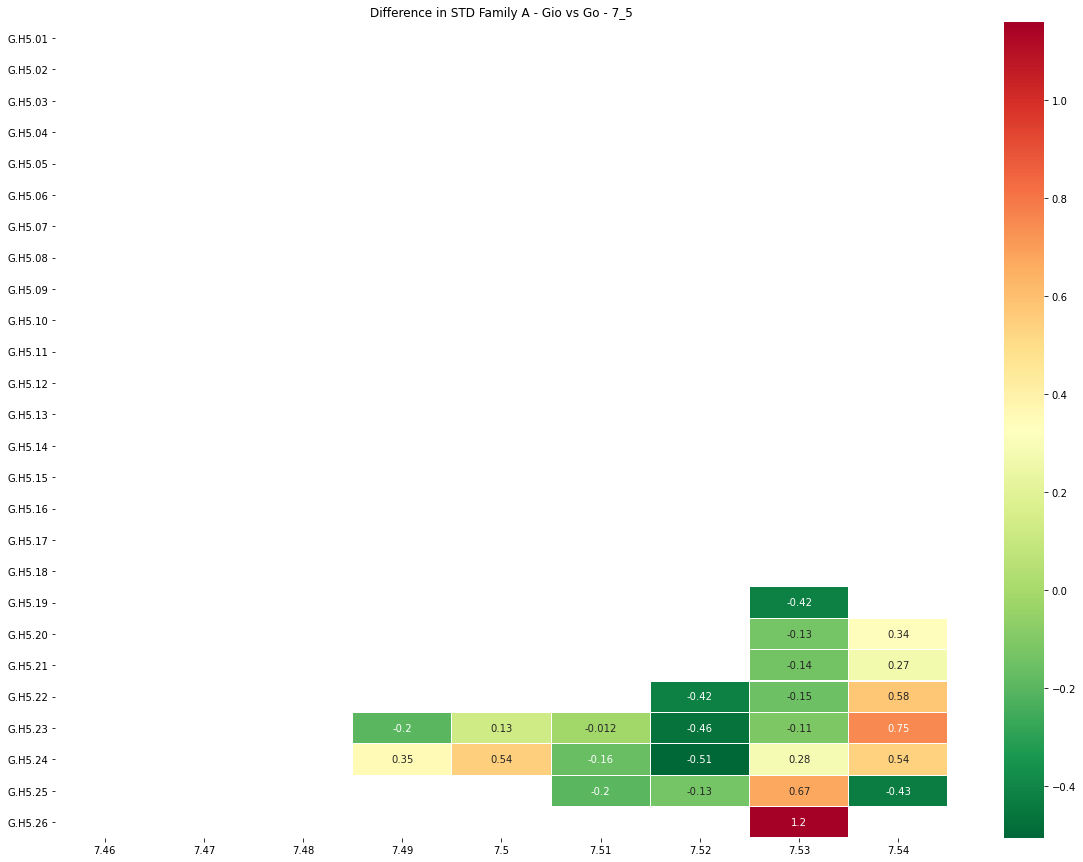

In [74]:
poi_str = list(str(poi[1]))[0] + '_' + ''.join(list(str(poi[1]))[2:])
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - ' + poi_str, save=True)

In [ ]:
#1: update databank, adding h5 gen numbers starting from end
#2: vectors  --> H5: h5.03 - h5.20; R: TM3-> 3.40 - 3.53, HN and H5
#            --> H1-H15, H16-H26
#3: classification of groups
#4: affinities --> 
#5: gq annotate

In [ ]:
# https://github.com/getcontacts/getcontacts